In [1]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation, sanity_check, plot_policy
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import SolverMdp, SolverIRL, SolverApp

### Setting

In [2]:
# Parameters
n = 10
wind_intensity = 0.0 # between 0 and 1
gamma = 0.7

In [3]:
grid = np.zeros((n, n))
goal = [                    
        [n-1, n-2], 
        [n-1]
        ]
obstacles = [
                [i for  i in range(0,int(n/1.2))],
                [int(n/2)]
                
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n))/(n**2)

In [4]:
obstacles

[[0, 1, 2, 3, 4, 5, 6, 7], [5]]

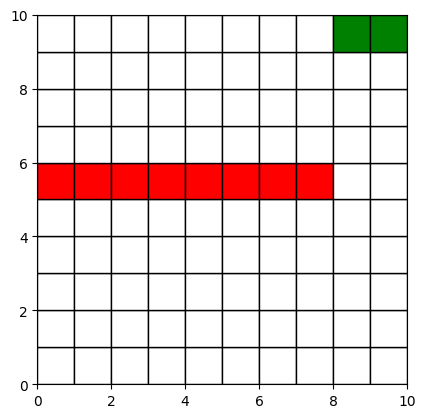

In [5]:
plot_gridworld(grid, obstacles, goal)

In [6]:
def transitions(s1, s , a, goal, n): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        if s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        if s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        if s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        if s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 0
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 1
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = -1
    return r

### Forward 

In [7]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Nov 27 02:54:35 PM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Nov 27 02:54:35 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 27 02:54:35 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 27 02:54:35 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 27 02:54:35 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 27 02:54:35 PM: Compiling problem (target solver=CLARABEL

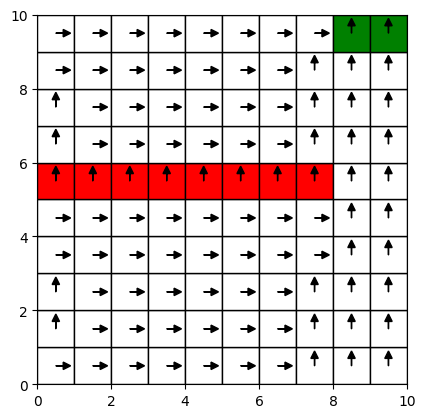

In [10]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

### SMD

### Exploration

In [719]:
def cost_prime(s, a, goal, obstacles):
    r = 10
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 5
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = 0
    return r

In [720]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, mu_e.value, cost_prime)
gridworld.get_mdp_app(transform=False)
gridworld.mdp_app.build_T()

In [721]:
solver = SolverApp(gridworld.mdp_app, gridworld.c_hat, gridworld.mdp_app.mu_e)
prob, c_exp, u_exp = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 03 09:51:13 AM: Your problem has 500 variables, 400 constraints, and 0 parameters.
(CVXPY) Sep 03 09:51:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 03 09:51:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 03 09:51:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 03 09:51:13 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 03 09:51:13 AM: Compiling problem (target solver=CLARABEL

In [722]:
(c_exp.value + np.transpose(gridworld.mdp_app.T) @ u_exp.value) @ gridworld.mdp_app.mu_e

np.float64(4.3075463812290575)

In [723]:
solver = SolverApp(gridworld.mdp_app, gridworld.c_hat, gridworld.mdp_app.mu_e)
prob, c_exp2, u_exp2 = solver.solve_constraint(np.linalg.norm(gridworld.c_hat))

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 03 09:51:13 AM: Your problem has 500 variables, 401 constraints, and 0 parameters.
(CVXPY) Sep 03 09:51:13 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 03 09:51:13 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 03 09:51:13 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 03 09:51:13 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 03 09:51:13 AM: Compiling problem (target solver=CLARABEL

In [724]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_exp.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_exp.value[i]

UP


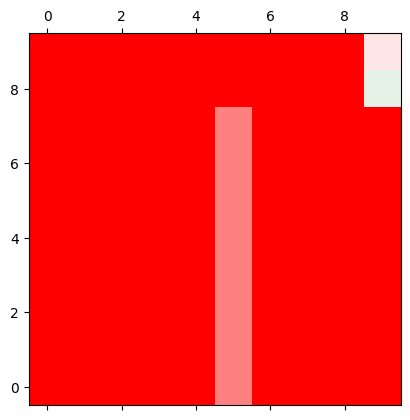

DOWN


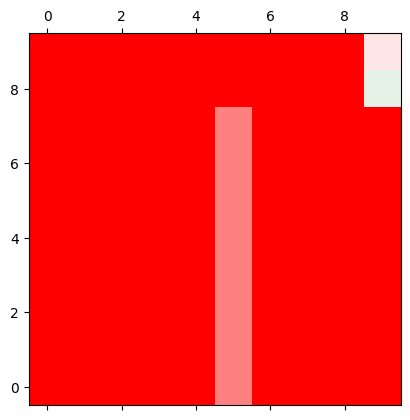

LEFT


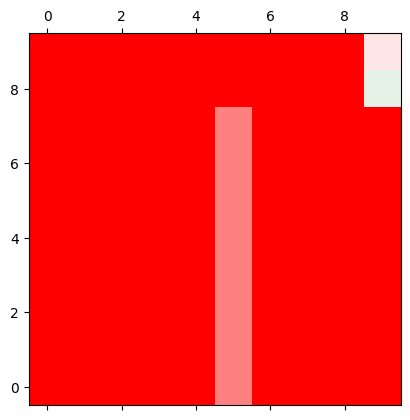

RIGHT


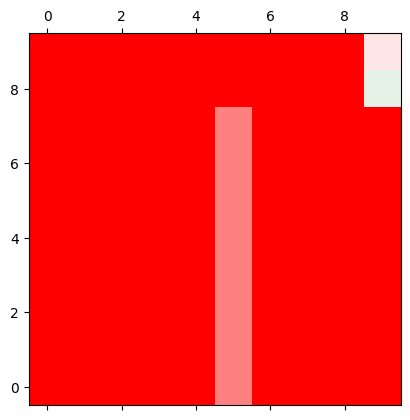

In [725]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

In [726]:
print("|| c_exp - c_true || = ", np.linalg.norm(c_exp.value - gridworld.c))
print("|| c_exp - c_hat || = ", np.linalg.norm(c_exp.value - gridworld.c_hat))
print("|| u_exp - u_true || = ", np.linalg.norm(u_exp.value - u_true))

|| c_exp - c_true || =  5656825.9677985525
|| c_exp - c_hat || =  1.1298790311207859e-08
|| u_exp - u_true || =  2828385.9689220935


### Inverse Optimization for Cost Function

In [727]:
gridworld = GridWorld(grid, obstacles, goal, actions, transitions, init_dist, cost, gamma, mu_e.value, cost_prime)
gridworld.get_mdp_IRL(transform=False)
gridworld.mdp_IRL.build_T()

In [728]:
solver = SolverIRL(gridworld.mdp_IRL, gridworld.c_hat, gridworld.mdp_IRL.mu_e)
prob, c_IRL, u_IRL = solver.solve()

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Sep 03 09:51:14 AM: Your problem has 500 variables, 401 constraints, and 0 parameters.
(CVXPY) Sep 03 09:51:14 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 03 09:51:14 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 03 09:51:14 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 03 09:51:14 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 03 09:51:14 AM: Compiling problem (target solver=CLARABEL

In [729]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c_IRL.value)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c_IRL.value[i]
u_reconstructed = np.zeros((n, n))
for i in range(len(u_IRL.value)):
    u_reconstructed[gridworld.S_to_grid[i][0], gridworld.S_to_grid[i][1]] = u_IRL.value[i]

UP


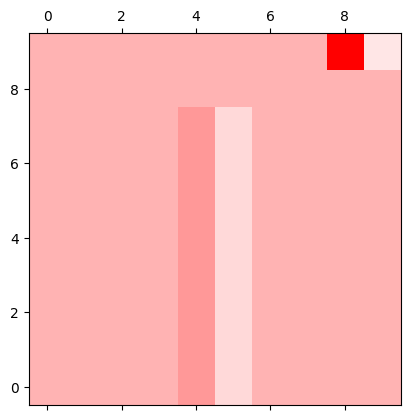

DOWN


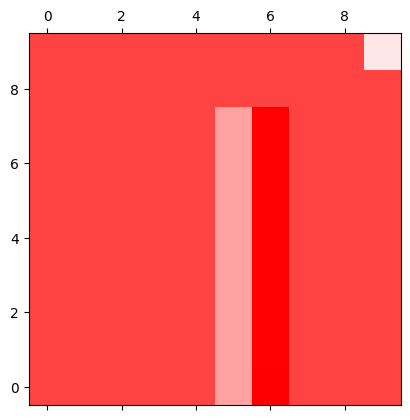

LEFT


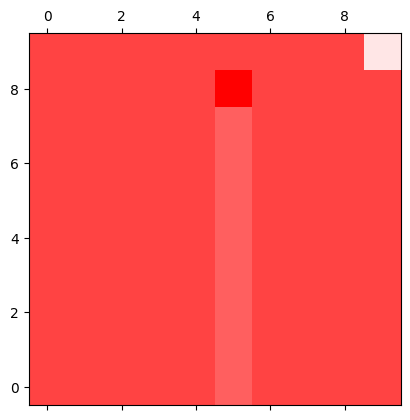

RIGHT


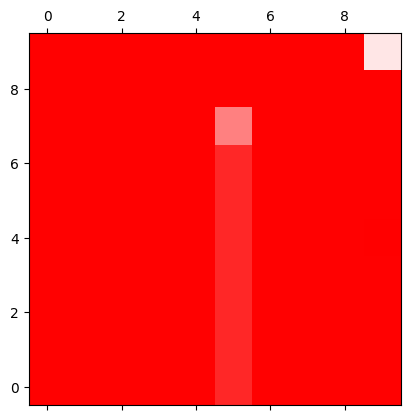

In [730]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

In [731]:
print("App problem")
print("|| c_exp - c_true || = ", np.linalg.norm(c_exp.value - gridworld.c))
print("|| c_exp - c_hat || = ", np.linalg.norm(c_exp.value - gridworld.c_hat))
print("|| u_exp - u_true || = ", np.linalg.norm(u_exp.value - u_true))
print(" ")

print("IRL problem")
print("|| c_IRL - c_true || = ", np.linalg.norm(c_IRL.value - gridworld.c))
print("|| c_IRL - c_hat || = ", np.linalg.norm(c_IRL.value - gridworld.c_hat))
print("|| u_IRL - u_true || = ", np.linalg.norm(u_IRL.value - u_true))
print(" ")
## Compare with the app problem ###
print("Comparison with the app problem")
print("|| c_IRL - c_exp || = ", np.linalg.norm(c_IRL.value - c_exp.value))
print("|| u_IRL - u_exp || = ", np.linalg.norm(u_IRL.value - u_exp.value))
print(" ")

print("Modified app problem")
print("|| c_exp2 - c_true || = ", np.linalg.norm(c_exp2.value - gridworld.c))
print("|| c_exp2 - c_hat || = ", np.linalg.norm(c_exp2.value - gridworld.c_hat))
print("|| u_exp2 - u_true || = ", np.linalg.norm(u_exp2.value - u_true))
print(" ")



App problem
|| c_exp - c_true || =  5656825.9677985525
|| c_exp - c_hat || =  1.1298790311207859e-08
|| u_exp - u_true || =  2828385.9689220935
 
IRL problem
|| c_IRL - c_true || =  5656816.6872468125
|| c_IRL - c_hat || =  36.55675819904047
|| u_IRL - u_true || =  2828352.977323109
 
Comparison with the app problem
|| c_IRL - c_exp || =  36.5567582047373
|| u_IRL - u_exp || =  99.73681108435633
 
Modified app problem
|| c_exp2 - c_true || =  5656825.96779855
|| c_exp2 - c_hat || =  5.05987787155325e-12
|| u_exp2 - u_true || =  2828385.968921279
 
